In [1]:
import sys
sys.path.append("..")
from utils import *
import json
import os
import matplotlib.pyplot as plt

In [2]:
def sig2pos(df,price,thd,type_):
    c1=np.sign(df.where(df>=thd))
    c2 = np.sign(df.shift(1).where(df.shift(1)<thd))
    c = c1*c2*type_
    df_ = c.shift(1).reindex_like(price[c.columns]).shift(-1)
    return df_
def sig2pos_v2(df,price,thd,type_):
    c1=np.sign(df.where(df>=thd))
#     c2 = np.sign(df.shift(1).where(df.shift(1)<thd))
    c = c1*type_
    df_ = c.shift(1).reindex_like(price[c.columns]).shift(-1)
    return df_

In [3]:
close = pd.read_hdf('../data/close_1min_swap.h5').resample('5min').last().loc['20220101':,:]

start backtest, please wait a min
backtest finished total comsume sec 1
start backtest, please wait a min
backtest finished total comsume sec 1


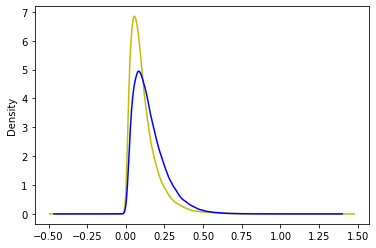

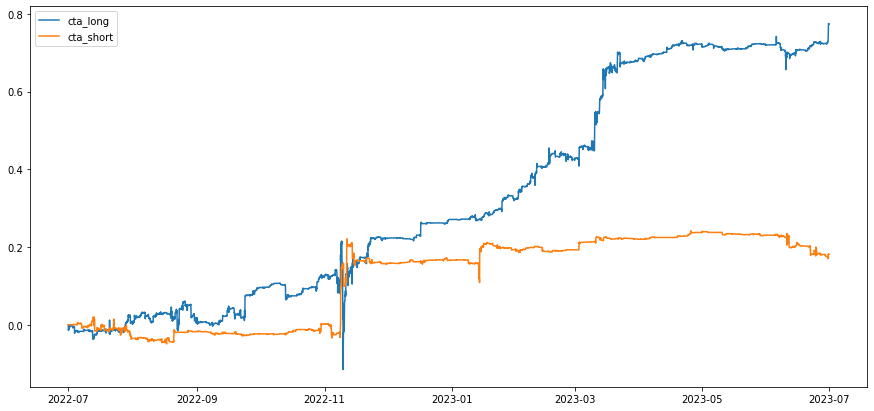

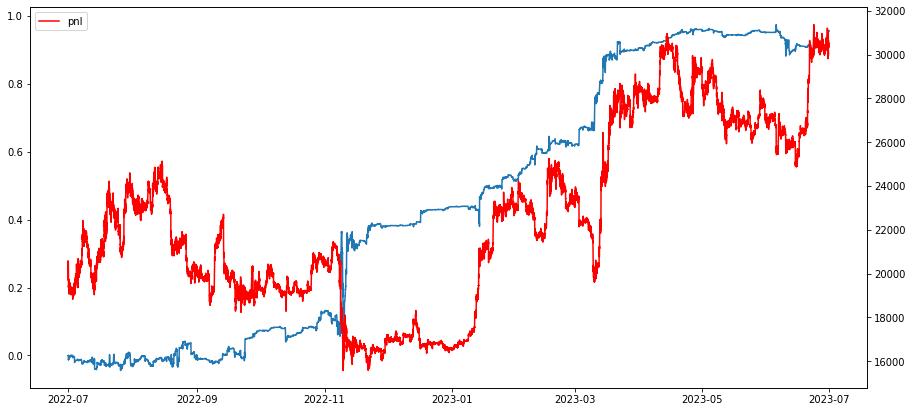

In [5]:
# for dir_ in l_dir:
sig_df ={}
pnl_overall = {}
file_long = 'long_Label_144_p_0_03_l_0_01_end_cap_iv_leave_31_0.06_min_leaf_20_ff_1_bf_1_l1_0_l2_0_r_5000_label_final.h5'
sig_df['lgb_sig_df_long'] = pd.read_hdf('LGBM_result/'+file_long)

file_short = 'short_Label_144_p_0_03_l_0_01_end_cap_withivsonly_leave_31_0.06_min_leaf_20_ff_1_bf_1_l1_0.2_l2_0.2_r_2000_label_final.h5'
sig_df['lgb_sig_df_short'] = pd.read_hdf('LGBM_result/'+file_short)

sig_df['lgb_sig_df_long'].mean(axis=1).plot(kind='kde',c='y')
sig_df['lgb_sig_df_short'].mean(axis=1).plot(kind='kde',c='b')

sig_long = sig2pos_v2(sig_df['lgb_sig_df_long'],close,0.6,1)
sig_short = sig2pos_v2(sig_df['lgb_sig_df_short'],close,0.7,-1)
#     profit_ = float((file_short.split('_p_')[1].split('_l')[0]).replace('_','.'))
#     loss_ = float((file_short.split('_l_')[1].split('_end')[0]).replace('_','.')) 
profit_ = 0.03
loss_ = 0.01
cta_pos_long = (cta_sig_v2(sig_long,close,profit = profit_,loss=loss_,hold_n=6,type_=1)/37)
t1 = time.time()
cta_pos_short = (cta_sig_v2(sig_short,close,profit = profit_,loss=loss_,hold_n=6,type_=-1)/37)

result = {}
BT_cta_long,_ = bcak_test((cta_pos_long/close*1000000).fillna(method='ffill'),close,fee=0.0003)
result['cta_long'] = BT_cta_long['total_pnl'].resample('1h').last().loc['20220701':]-BT_cta_long['total_pnl'].resample('1h').last().loc['20220701':].iloc[0]
BT_cta_short,_ = bcak_test((cta_pos_short/close*1000000).fillna(method='ffill'),close,fee=0.0003)
result['cta_short'] = BT_cta_short['total_pnl'].resample('1h').last().loc['20220701':]-BT_cta_short['total_pnl'].resample('1h').last().loc['20220701':].iloc[0]
df_pos = pd.DataFrame(result)
fig = plt.figure(figsize=(15,7))
plt.plot(df_pos)
plt.legend(df_pos.columns)
plt.show()
fig = plt.figure(figsize=(15,7))
plt.plot((result['cta_long']+result['cta_short']))
ax2 = plt.twinx()
ax2.plot(close['binance.btc_usdt_swap'].loc['20220701':],c='r')
pnl_overall['before'] = result['cta_long']+result['cta_short']
plt.legend(['pnl','btc'])
plt.show()

<AxesSubplot:xlabel='datetime'>

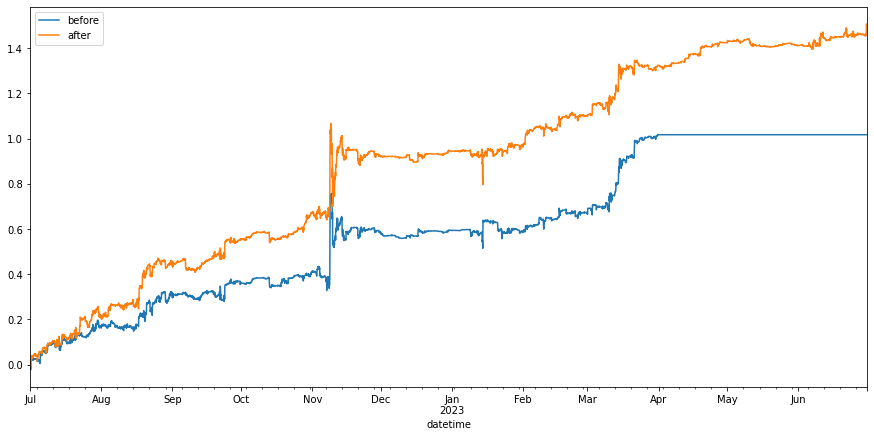

In [55]:
pd.DataFrame(pnl_overall).plot(figsize=(15,7))